The data comes to us from a Kaggle competition: https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-data-analysis.

Underneath inspiration:

"Understand customer demographics and buying behavior. Use predictive analytics to analyze the most profitable customers and how they interact. Take targeted actions to increase profitable customer response, retention, and growth."

Was helped a bit by: https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-data-analysis-prediction. 

We're going to aim to try to familiarize ourselves with the dataset, and see if we can get some meaningful recommendations from it. 

Here are some concerns we want to address:
1. Where are customers with the highest lifetime values coming from?
2. Is there a connection between income, where people live, and what kind of coverage they purchase?
3. How does employment status interact with coverage purchased?



# Initial Exploration

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv?cm_mc_uid=05163241209015575264632&cm_mc_sid_50200000=56851741557526463256')

In [123]:

df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [31]:
df['State'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], dtype=object)

In [32]:
df.shape

(9134, 24)

In [33]:
df.State.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [35]:
len(df.State)

9134

The distribution is skewed right. There's a larger represntaiton of data for California. Nevada and Washington are comparably small.

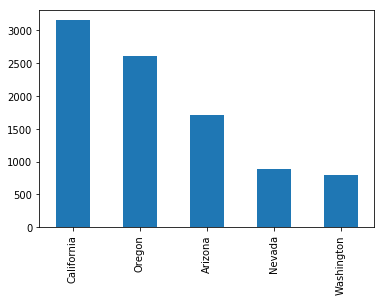

In [49]:
df.State.value_counts().head(9134).plot(kind='bar')
plt.show()

In [86]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
living = pd.DataFrame(artists.yearOfDeath.isnull())
living = pd.DataFrame(living.yearOfDeath.value_counts())
living.plot(kind='bar', legend=False)
plt.title('Artists Who are No Longer Living')

# Descriptive Analytics

## 1. What causes the Customer Lifetime Value to increase?

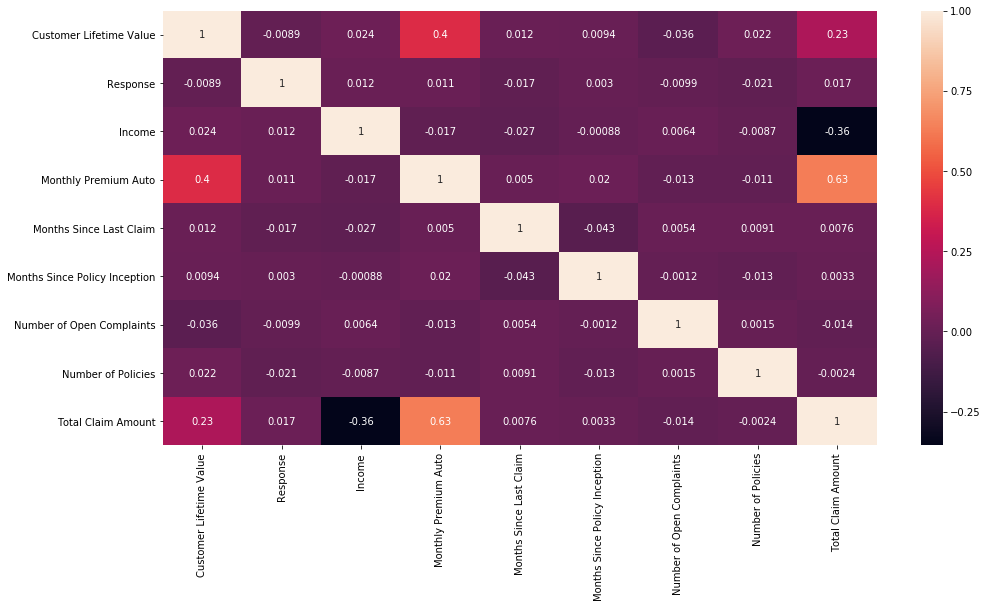

In [106]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

Some observations from the above:
1. There's a strong positive correlation between total claim amount and the monthly premium you pay. So as your montly premium goes up, the more your total claim goes up. I wonder if this means that those who claim more are going to have more income to spare? Or would they claim more becuase of living in high risk places?
2. There's a connection between the customer lifetime value and the monthly rpemium on the auto, and a weaker (but probably consequent) connection between customer lifetime value and the ttoal claim amount. That is, the customers have a higher value in the system, if they pay more money into the system.
3. There's a negative correlation between Income and the total claim amount. That is, it seems like the more you claim, the lower your income. And ht eless you claim, the higher your income.

So, in summary:
1. As your premium increases, your total claim increases.
2. You have a higher customer liftiem value if you pay more per month. 
3. If you have a lower income, you claim more; which probably means you have a higher customer value in the system if you make less money.

So, where do the people with the highest customer valuess live? 

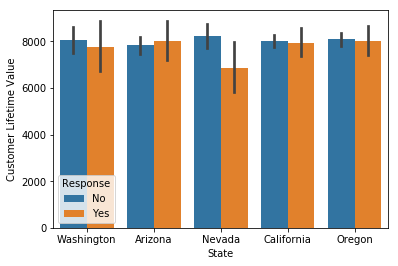

In [5]:
sns.barplot(x='State', y='Customer Lifetime Value', hue = "Response", data=df)
plt.show()

At first glance, it seems like the type of state we go to doesn't really impact the value of the customer. But, we know from above that Nevada and Washington have the least amount of customers. 

What if we evaluate each state bar, by the type of coverage purchased? More per month will be payed with more coverage, so the more of the high value policies we have, the more we can determine where we should increase our foucs. 

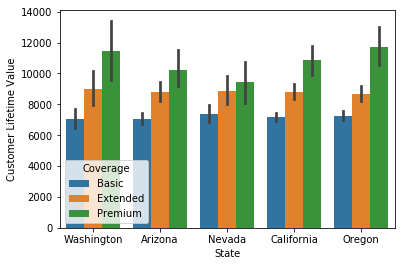

In [62]:
sns.barplot(x='State', y='Customer Lifetime Value', hue="Coverage", data=df)
plt.show()

Just looking accross, basic and extended groupings are both really similar between all states. **The "money" seems to be in premium coverage.** This means that the Customer Lifetime Value for each state seems to be derived from the type of coverage each state has. 

And when we look at the distance between green and gold bars in California and Oregon and Washington, this really does seem to account for a lot of the increased value in those states. 

We know most of our customers are from California and Oregon, and that Washington seems to have a fair amount of policies purchased as well. 

Is there another factor that might be contributing to customer value here? Where do the poeple with the most income live?

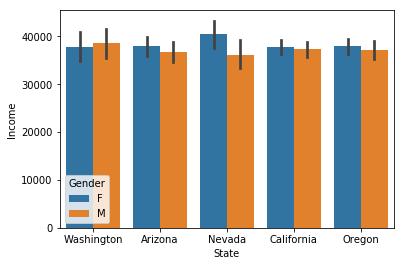

In [65]:
sns.barplot(x='State', y='Income', hue = "Gender", data=df)
plt.show()

Interestingly, women generally are making more than men in each state, except Washington. For the most part, they do seem pretty evenly split among the states.

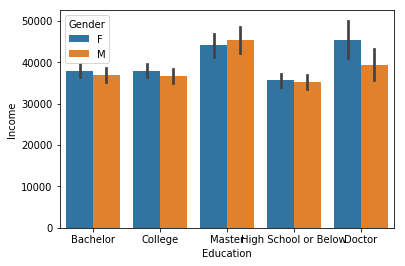

In [75]:
sns.barplot(x='Education', y='Income', hue = "Gender", data=df)
plt.show()

So, gender, policy type, and location all seem to influence customer value and responsiveness.

Also seems to be the case that female doctors are making the most money on average, with the most potential earning power. 

Having a masters degree or above really does influence earning potential.

All in all, higher degrees, higher incomes, seem to lead to higher coverage which influences higher customer lifetime values.

## 2. Do sales mediums influence the responsiveness of the consumer?

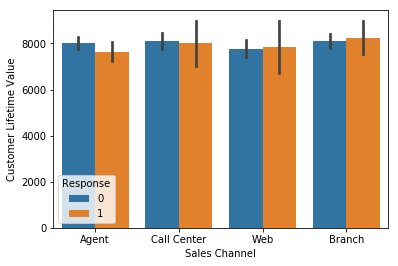

In [108]:
sns.barplot(x='Sales Channel', y='Customer Lifetime Value', hue = "Response", data=df)
plt.show()

#0 = No, 1 = Yes

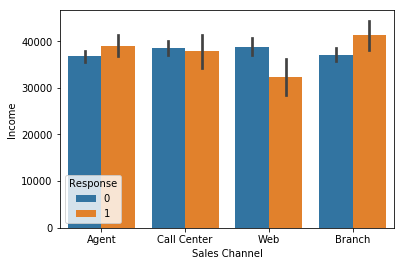

In [107]:
sns.barplot(x='Sales Channel', y='Income', hue = "Response", data=df)
plt.show()

In terms of customer lifetime, the medium we use doesn't seem to influence a yes or no. But, when we take that in combination with income, there does seem to be an impact. **People with higher income are more responsive. But, not with web ads. And that means we should aim at the people with higher income with personal contact to maximize returns. And we might want to figure out why they're not responding to our web contacts.**

So, where are the people with the highest income, and what kind of coverage do they purchase?

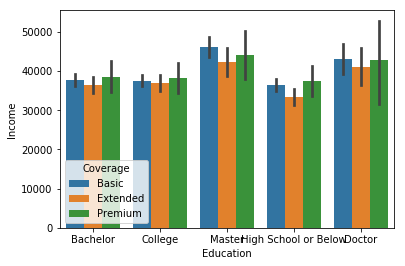

In [73]:
sns.barplot(x='Education', y='Income', hue = "Coverage", data=df)
plt.show()

Interesting. Overall, it seems like people don't really very much in the type of coverage they purchase until they get to a Masters or Doctors level of education. There's a high degree of variability for Doctors on Premium policies- this might be a group to target with personal calls from agents or branches. 

Consistent with our previous section, it may be that personal calls to those with the highest income/education levels, especially if they're female, would increase the probability of getting higher coverage. 

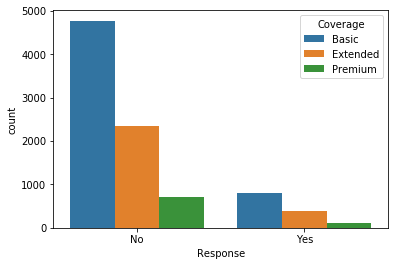

In [124]:
sns.countplot(x='Response', hue = "Coverage", data=df)
plt.show()

Importantly, most of the customers we interact with will not respond. It seems that a higher proportion of "yes" responses come from those have basic coverage. 

## 3. How does policy type influence responsiveness?

What's the response rate look like for our customers?

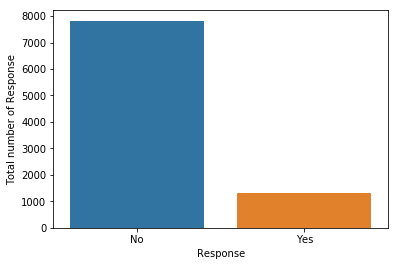

In [128]:
#df.Response = df.Response.apply(lambda X : 0 if X == 'No' else 1)

sns.countplot(x = 'Response', data = df)
plt.ylabel('Total number of Response')
plt.show()

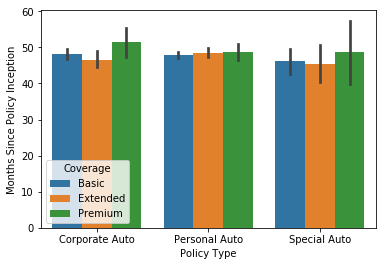

In [129]:
sns.barplot(x='Policy Type', y='Months Since Policy Inception', hue = "Coverage", data=df)
plt.show()

Those with basic or premium corporate or special policies are most likely to retain their policies longest. 

This means we should target those with corporate-basic or corporate-premium policies, or special-basic or special-premium for retnetion calls. 

Generally, there seems to be a lot of retention accross the board when we get a client.

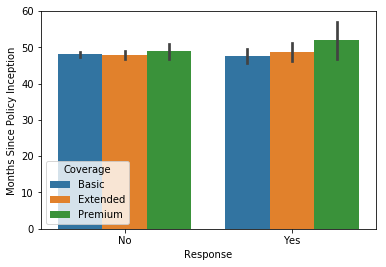

In [133]:
sns.barplot(x='Response', y='Months Since Policy Inception', hue = "Coverage", data=df)
plt.show()

Generally, those who spend more months in a policy seem to be more responsive to calls. We pointed out that premium policies above should be an area of focus. 

# Topics and Questions for Future exploration

We could look at a lot more questions in the future:

1) How does marital status influence responsivenss?

2) Is income concentrated with married students?

3) How does vehicle type owned influence policy purchasing or responsiveness?

4) How does responsiveness change over time? 

5) If we exclude Nevada and Washington, what happens to our data? What if we focus only on Nevada and Washington?